## Observations and Insights

Capomulin and Ramicane appear to have the best performance in terms of lower tumor volume mean. 

Capomulin and Ramincae also have a lower variance and SEM whil also having a higher data count. Campomulin also has a low standard deviation.

Similar number of male and female mice used in testing



## Dependencies and starter code

In [374]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
metadata = "data/Mouse_metadata.csv"
results = "data/Study_results.csv"

# Read the mouse data and the study results
metadata = pd.read_csv(metadata)
results = pd.read_csv(results)



In [375]:
# Combine the data into a single dataset
combined = metadata.merge(results, on="Mouse ID")
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [376]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
TumorVol = combined.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']]
summary = TumorVol.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :['mean', 'median', 'var', 'std','sem','count']})
summary

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       161  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

## Bar plots

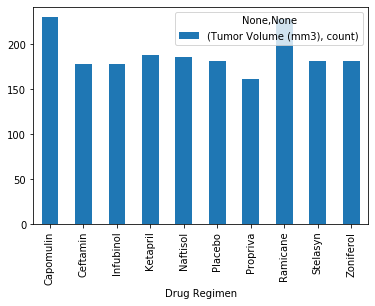

In [377]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
TumorVol = combined.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']]
summary = TumorVol.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :['count']})
summary

df = pd.DataFrame(summary)
df.plot(kind="bar", figsize=(6,4))
plt.show()

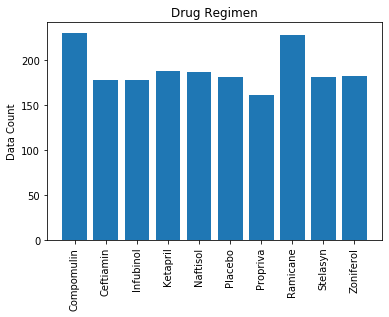

In [378]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
DrugList = ('Compomulin', 'Ceftiamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')
yaxis = np.arange(len(DrugList))
DataCount = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

plt.bar(yaxis, DataCount, align='center', alpha=1)
plt.xticks(yaxis, DrugList)
plt.xticks(rotation=90)
plt.ylabel('Data Count')
plt.title('Drug Regimen')

plt.show()

## Pie plots

In [379]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_summary = combined.groupby(['Sex']).\
    agg({'Mouse ID':['count']})
gender_summary

,Mouse ID
,count
Sex,
Female,935
Male,958


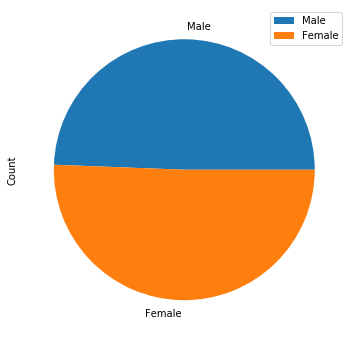

In [380]:
gender = pd.DataFrame({'Sex':['Male', 'Female'], 'Count':[935, 958]}, index=['Male', 'Female'])

piecount = gender.plot.pie(y='Count', figsize=(6,6))

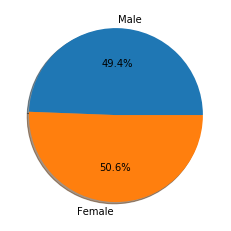

In [381]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels='Male', 'Female'
countp=[935, 958]
plt.pie(countp, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

## Quartiles, outliers and boxplots

In [382]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

topregimens = combined[combined["Drug Regimen"].isin(['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin'])]
topregimens.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [383]:
topregimens2 = topregimens.sort_values(['Timepoint'], ascending=True)
topregimens2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1059,k603,Propriva,Male,2,27,0,45.0,0
125,r554,Capomulin,Female,8,17,0,45.0,0
1024,k210,Ceftamin,Male,15,28,0,45.0,0
984,j296,Ceftamin,Female,24,30,0,45.0,0


In [384]:
top4regimens = topregimens2[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
top4regimens.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1059,Propriva,k603,0,45.0
125,Capomulin,r554,0,45.0
1024,Ceftamin,k210,0,45.0
984,Ceftamin,j296,0,45.0


In [385]:
mouse_regimens = top4regimens.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

mouse_regimens_df = pd.DataFrame(mouse_regimens)
mouse_regimens_df.head()


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220

In [386]:
# mouse_regimens_unstack = mouse_regimens_df.unstack(level=0)
mouse_regimens_unstack = mouse_regimens_df.stack(level=0).unstack(level=0)
mouse_regimens_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Propriva,Ramicane
Mouse ID,,,,,
a275,Tumor Volume (mm3),NaN,62.999356,NaN,NaN
a411,Tumor Volume (mm3),NaN,NaN,NaN,38.407618
a444,Tumor Volume (mm3),NaN,NaN,NaN,43.047543
a520,Tumor Volume (mm3),NaN,NaN,NaN,38.810366
a644,Tumor Volume (mm3),NaN,NaN,NaN,32.978522


In [387]:
quartiles1 = mouse_regimens_unstack['Capomulin'].quantile([.25,.5,.75]).round(1)
lower1 = quartiles1[.25].round(1)
upper1 = quartiles1[.75].round(1)
iqr1 = round(upper1-lower1,1)
lower_Whisker1 = round(lower1 - (1.5*iqr1),1)
upper_Whisker1 = round(upper1 - (1.5*iqr1),1)   

print(f'Capomulin: lower quartile = {lower1}... upper quartile = {upper1}... IQR = {iqr1}')
 

Capomulin: lower quartile = 32.4... upper quartile = 40.2... IQR = 7.8


In [388]:
quartiles2 = mouse_regimens_unstack['Ramicane'].quantile([.25,.5,.75]).round(1)
lower2 = quartiles2[.25].round(1)
upper2 = quartiles2[.75].round(1)
iqr2 = round(upper2-lower2,1)
lower_Whisker2 = round(lower2 - (1.5*iqr2),1)
upper_Whisker2 = round(upper2 - (1.5*iqr2),1)   

print(f'Ramicane: lower quartile = {lower2}... upper quartile = {upper2}... IQR = {iqr2}')

Ramicane: lower quartile = 31.6... upper quartile = 40.7... IQR = 9.1


In [389]:
quartiles3 = mouse_regimens_unstack['Propriva'].quantile([.25,.5,.75]).round(1)
lower3 = quartiles3[.25].round(1)
upper3 = quartiles3[.75].round(1)
iqr3 = round(upper3-lower3,1)
lower_Whisker3 = round(lower3 - (1.5*iqr3),1)
upper_Whisker3 = round(upper3 - (1.5*iqr3),1)   

print(f'Propriva: lower quartile = {lower3}... upper quartile = {upper3}... IQR = {iqr3}')

Propriva: lower quartile = 49.1... upper quartile = 62.6... IQR = 13.5


In [390]:
quartiles4 = mouse_regimens_unstack['Ceftamin'].quantile([.25,.5,.75]).round(1)
lower4 = quartiles4[.25].round(1)
upper4 = quartiles4[.75].round(1)
iqr4 = round(upper4-lower4,1)
lower_Whisker4 = round(lower4 - (1.5*iqr4),1)
upper_Whisker4 = round(upper4 - (1.5*iqr4),1)   

print(f'Ceftamin: lower quartile = {lower4}... upper quartile = {upper4}... IQR = {iqr4}')

Ceftamin: lower quartile = 48.7... upper quartile = 64.3... IQR = 15.6


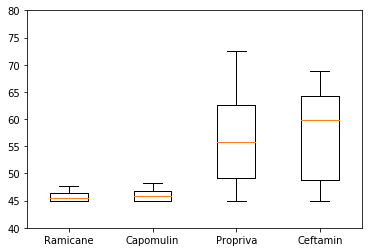

In [391]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
lead_regimens = ['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']

tumors = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df2 = tumor_df.reindex(lead_regimens)
tumor_vol = [vol for vol in tumor_df2['Tumor Volume (mm3)']]

plt.boxplot(tumor_vol, labels=lead_regimens)
plt.ylim(40, 80)
plt.show()


## Line and scatter plots

In [392]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = combined.loc[combined['Drug Regimen'] == "Capomulin",:]
mouse_line_df = capo_df.loc[capo_df['Mouse ID'] == 'y793',:]
mouse_line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2


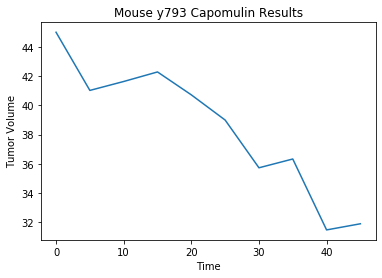

In [397]:
time_axis = mouse_line_df['Timepoint']
tumor_size = mouse_line_df['Tumor Volume (mm3)']

plt.plot(time_axis, tumor_size)
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.title('Mouse y793 Capomulin Results')
plt.show()

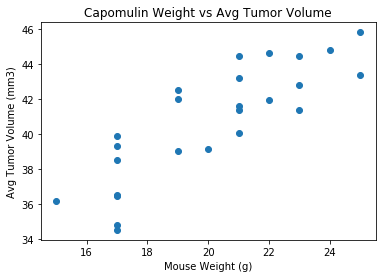

In [398]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_avg = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Capomulin Weight vs Avg Tumor Volume')
plt.show()

In [395]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])[0],2)
print(corr)

0.84


In [396]:
regress=st.linregress(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
regress

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)